In [1]:
import matplotlib.pyplot as plt
import time

from preprocessing.features_with_threading import *

In [2]:
start = time.perf_counter()
my_image = cv2.imread("resources/Comb/image_2.png")
img_gray = cv2.cvtColor(my_image, cv2.COLOR_BGR2GRAY)
end = time.perf_counter()
print("Loading Image - Execution time: ", end - start)

Loading Image - Execution time:  0.004187699999999239


Corners Detection Good Feature To Track - Execution time:  0.05841850000000015


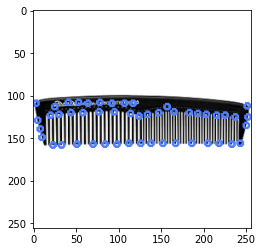

In [3]:
start = time.perf_counter()
CD = CornersDetection(img_gray, my_image.copy())
CD.get_corners()
plt.imshow(CD.image)
end = time.perf_counter()
print("Corners Detection Good Feature To Track - Execution time: ", end - start)

Execution time:  0.06335469999999965


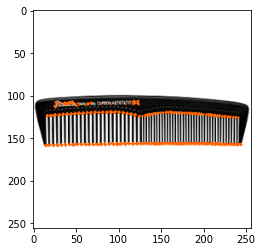

In [4]:
start = time.perf_counter()
CH = CornerHarrisDetection(img_gray, my_image.copy())
CH.get_harris_corners()
plt.imshow(CH.image)
end = time.perf_counter()
print("Execution time: ", end - start)

bright image
Contour Detection - Execution time:  0.048444099999999324


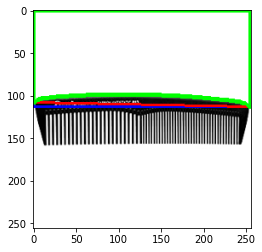

In [5]:
start = time.perf_counter()
mean_of_gray_image = np.mean(img_gray)
if mean_of_gray_image < 180:
    # Image is dark
    print("dark image")
    contour_recognition_threshold = 120
else:
    print("bright image")
    # Image is bright
    contour_recognition_threshold = 200

# thresholding
img_thresh = thresholding_image(img_gray, contour_recognition_threshold)
CN = ContoursDetection(img_thresh, my_image.copy())
CN.get_biggest_contour()
CN.contour_features()
plt.imshow(CN.image)
end = time.perf_counter()
print("Contour Detection - Execution time: ", end - start)

One by One Execution time:  0.012830399999998576


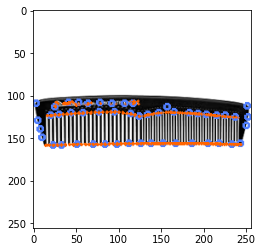

In [11]:
img = my_image.copy()
F1 = CornersDetection(img_gray, img)
F2 = CornerHarrisDetection(img_gray, img)
F3 = ContoursDetection(img_thresh)

start = time.perf_counter()

F1.get_corners()
F2.get_harris_corners()
F3.get_biggest_contour()
F3.contour_features()

end = time.perf_counter()
plt.imshow(F1.image)
print("One by One Execution time: ", end - start)

In [7]:
a = CornersDetection(img_gray)
b = CornerHarrisDetection(img_gray)
c = ContoursDetection(img_thresh)
featuresExtraction = [a, b, c]
start = time.perf_counter()
for F in featuresExtraction:
    F.preprocess()
end = time.perf_counter()
print("One by One Execution time: ", end - start)

One by One Execution time:  0.009096000000001325
